<a href="https://colab.research.google.com/github/RubenMcCarty/Deep-Learning-RQ/blob/main/3_probabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probabilidad
# [MSc. Ruben Quispe](https://www.linkedin.com/in/ruben-quispe-l/)

La teoría de la `probabilidad` es la rama de las matemáticas que se encarga de la representación de fenómenos aleatorios o inciertos. En aplicaciones de `Inteligencia Artificial` se usa de dos formas. En primer lugar, las leyes de la probabilidad nos indican la manera en que nuestros sistemas de IA deberían razonar, de manera que diseñamos nuestros algoritmos para aproximar diferentes expresiones derivadas a partir de estas leyes. En segundo lugar, utilizamos probabilidad y `estadística` para analizar el comportamiento teórico de estos algoritmos. Si bien la probabilidad nos ayuda a llevar a cabo razonamientos en presencia de incertidumbre, la teoría de la `información` nos permite cuantificar la cantidad de incertidumbre en una distribución probabilística.   

## Fuentes de Incertidumbre

La mayoría de aplicaciones relacionadas con la ciencia de la computación son `deterministas` (el resultado es el mismo en cada ejecución de un programa). Sin embargo, en el campo de la IA y el `Machine Learning` en particular nos enfrentamos a `incertidumbre` y `estocasticidad` de manera contínua (el resultado de un programa es diferente cada vez que lo ejecutamos). Las principales fuentes de esta incertidumbre son:

- Estocasticidad inherente al sistema modelado debido, por ejemplo, a dinámicas aleatorias (imagina que queremos entrenar una IA para ganar a un juego de cartas, en cada partida las cartas están barajadas de manera aleatoria).
- Observabilidad parcial, incluso en sistemas totalmente determinísticos no tener acceso a toda la información es una fuente importante de incertidumbre.
- Modelado incompleto debido al descarte de parte de la información observada.

Pese a que tenemos estas fuentes de incertidumbre, en muchos casos es mejor desde un punto de vista práctico utilizar reglas sencillas con incertidumbre que funcionen en la mayoría de ocasiones que reglas ciertas pero complicadas de desarrollar. Incluso si existe una regla verdadera y determinista, el coste que conlleva su desarrollo y su propensión a tener errores no compensa.

## Probabilidad

Originalmente, la teoría de la probabilidad se desarrolló para analizar la frecuencia de eventos. Por ejemplo, cuando decimos que en un dado tenemos una probabilidad de $1/6$ de sacar un $6$ significa que si repetimos el evento de manera infinita, en el límite observaremos un resultado de $6$ en $1$ de cada $6$ tiradas. Este razonamiento, sin embargo, no es extensible a otras aplicaciones. En el caso de un sistema de diagnóstico médico decir que un paciente tiene una probabilidad de $1/6$ de tener una enfermedad es una medida del `grado de credibilidad`, siendo un valor de $1$ la certeza absoluta de que el paciente está enfermo y $0$ la certeza absoluta de que no lo está. Este tipo de probabilidad se conoce por el nombre de `probabilidad Bayesiana`, mientras que el primer tipo mencionado se conoce como `probabilidad frecuentista`.

## Variables aleatorias

Una `variable aleatoria` es una variable que puede tener diferentes valores de manera aleatoria. 

In [1]:
import numpy as np

x = np.random.randn(3)
x

array([-1.73954517,  1.18882995,  0.98084334])

> ⚠️ Cada vez que ejecutes la casilla anterior obtendrás un vector con valores distintos. Puedes usar la función `np.random.seed(SEMILLA)` para fijar una `semilla` de manera que los números aleatorios generados en diferentes ejecuciones serán siempre los mismos.

Una variable aleatoria no es más que la descripción de todos los posibles estados, los cuales vienen definidos por una `distribución de probabilidad`.

## Distribuciones de probabilidad

Una `distribución de probabilidad` es la descripción de cómo es de probable que una variable aleatoria tome un valor en particular u otro. Esta descripción dependerá de si la variable aleatoria es `discreta` o `continua`.

### Variables Discretas

Para describir la distribución de probabilidad de una variable discreta utilizamos una `función de masa de probabilidad` (PMF), normalmente con la notación $P(x)$. Esta función nos dice cómo de probable es que una variable aleatoria tenga un valor de $x$, siendo $P(x)=1$ la certeza absoluta de que la variable aleatoria toma el valor $x$ y $P(x)=0$ la certeza absoluta de que no lo toma. Puede aplicarse a varias variables aleatorias a la vez, por ejemplo $P(x,y)$ describe la probabilidad de que una variable aleatoria tome el valor $x$ y otra el valor $y$ de manera simultánea. Esta función debe cumplir unos requisitos, principalmente:

- $0 \leq P(x) \leq 1$, la probabilidad de un evento siempre es un número entre 0 (imposible) y 1 (seguro).
- $\sum_x P(x) = 1$, la suma de las probabilidades de todos los eventos posibles siempre vale 1.

Nuestro ejemplo anterior del dado es un caso de función de masa de probabilidad, en este caso uniforme, en la que tenemos 6 estados diferentes y cada posible caso tiene una probabilidad de $1/6$, cumpliendo los dos requisitos anteriores.

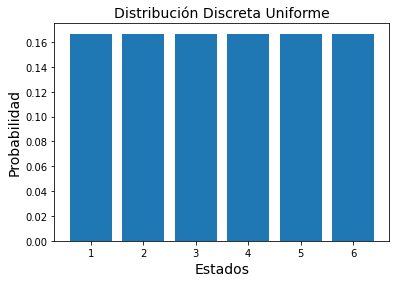

In [2]:
import matplotlib.pyplot as plt

P = np.full(6,1/6)
x = list(range(1,7))

plt.bar(x, P)
plt.xlabel("Estados", fontsize=14)
plt.ylabel("Probabilidad", fontsize=14)
plt.title("Distribución Discreta Uniforme", fontsize=14)
plt.show()

### Variables Continuas

Describimos la distribución de probabilidad de una variable continua mediante la `función de densidad de probabilidad` (PDF), normalmente con la notación $p(x)$. En este caso no tenemos eventos discretos en los que podemos evaluar nuestra variable, sino que ésta toma un valor en una región infinitesimal dada por la función de probabilidad. También debe cumplir unos requisitos similares a los anteriores:

- $0 \leq p(x) \leq 1$, la probabilidad de un evento siempre es un número entre 0 (imposible) y 1 (seguro).
- $\int_x p(x) dx = 1$, la suma de las probabilidades de todos los eventos posibles siempre vale 1.

La distribución de probabilidad contínua más común es la `distribución Gaussiana`.

$$ N(x; \mu,\sigma^ 2) = \sqrt{\frac{1}{2 \pi \sigma^2}}exp \left( - \frac{1}{2 \sigma^2} (x-\mu)^2 \right) $$

donde $\mu$ es el `valor medio` de la distribución y $\sigma^2$ es la `variancia` de la distribución.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/720px-Normal_Distribution_PDF.svg.png)

In [3]:
# distribución gaussiana

m, s = 0, 0.2
x = np.random.normal(m, s)
x

0.4998059644886735

Otras distribuciones comunes son: `Bernouilli` para variables aleatorias binarias, `Laplace` cuando queremos una distribución con un valor muy grande cerca de $x=0$, `Dirac` cuando queremos concentrar toda la densidad de probabilidad en un solo valor, etc. También es común encontrar `mezclas` de distribuciones en las que el valor de la variables final es la suma ponderada de cada una de las distribuciones, $p(x) = \sum_i w_i p_i(x)$. El ejemplo más común es la `mezcla de distribuciones Gaussianas` (GMM, *Gaussian mixture models*) ya que permite aproximar cualquier densidad de probabilidad mediante la superposición de distribuciones de tipo Gaussiana.

![](https://miro.medium.com/max/1200/1*lTv7e4Cdlp738X_WFZyZHA.png)

## Probabilidad Marginal

A veces conocemos la distribución de probabilidad sobre un conjunto de variables aleatorias, por ejemplo $P(x,y)$, y queremos conocer la distribución de probabilidad sobre una de ellas, por ejemplo $P(x)$. Esto se conoce como `probabilidad marginal` y se puede calcular utilizando la `regla de la suma`, $P(x) = \sum_y P(x, y)$.

## Probabilidad Condicional

La `probabilidad condicional` nos dice la probabilidad de que un evento ocurra dado que otro evento ya haya ocurrido. Esto se denota como $P(y|x)$, donde $x$ es el evento que ya ha ocurrido e $y$ es el evento del que queremos conocer su probabilidad. Se puede calcular con la siguiente fórmula

$$ P(y|x) = \frac{P(y,x)}{P(x)} $$

Podemos encontrar la probabilidad conjunta sobre un muchas variables aleatorias descomponiéndola en probabilidades condicionales sobre una sola variable

$$ P(x_1, x_2, ..., x_n) = P(x_1) \prod_{i=2}^n P(x_i | x_1, x_2, ..., x_{i-1}) $$

Esto se conoce como la `regla de la cadena` de la probabilidad.

## La regla de Bayes

En ocasiones conocemos $P(y|x)$ pero queremos conocer $P(x|y)$. Si conocemos $P(x)$ podemos calcularlo usando la `regla de Bayes`.

$$ P(x|y) = \frac{P(x)P(y|x)}{P(y)} $$

Si no conocemos $P(y)$ podemos calcularlo usando la regla de la suma, $P(y) = \sum_x P(y|x)P(x)$.

## Funciones comunes

Para terminar, vamos a ver algunas funciones comunes que nos encontraremos de manera recurrente y algunas de sus propiedades.

### Sigmoid

Definimos la función `sigmoid` como 

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

Esta función opera en el rango $(0, 1)$ por lo que es muy útil para obtener probabilidades.

![](https://qph.fs.quoracdn.net/main-qimg-6b67bea3311c3429bfb34b6b1737fe0c)

In [5]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [6]:
z = np.array([-10, 0, 10])
sigmoid(z)

array([4.53978687e-05, 5.00000000e-01, 9.99954602e-01])

Los valore muy positivos o muy negativos saturan a $0$ y $1$, respectivamente.

### Softmax

Definimos la función `softmax` como

$$ \sigma(z_i) = \frac{e^{z_i}}{\sum_j e^{z_j}} $$

Esta función recibe como argumento un vector de valores reales y lo transforma en una distribución de probabilidad.

In [7]:
def softmax(z):
    return np.exp(z)/sum(np.exp(z))

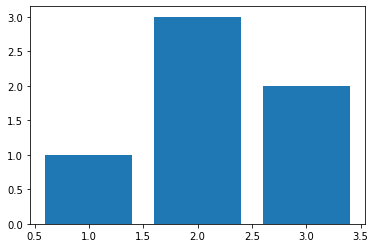

In [8]:
z = np.array([1, 3, 2])
plt.bar(list(range(1,4)), z)
plt.show()

In [9]:
x = softmax(z)
x

array([0.09003057, 0.66524096, 0.24472847])

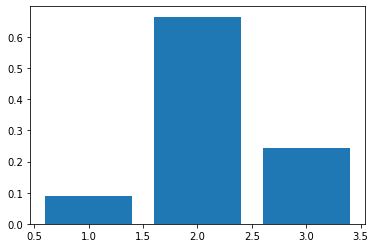

In [10]:
plt.bar(list(range(1,4)), x)
plt.show()

In [11]:
sum(z), sum(x)

(6, 1.0)

Utilizaremos esta función para generar distribuciones de probabilidad. Como puedes ver su efecto es el de hacer los valores grandes todavía más grandes y los pequeños todavía más pequeños (es una versión "suave" de la operación $max(z)$).

## Resumen

En este post hemos visto los conceptos básicos de la teoría de la `probabilidad` que tenemos que conocer para el desarrollo de algoritmos de `Inteligencia Artificial`, en particular de `Machine Learning` y `Deep Learning`. Al trabajar con estos algoritmos nos enfrentamos constantemente a la `incertidumbre`, que puede ser debida a varias causas. Nuestros modelos tienen que poder manejar esta incertidumbre para poder dar resultados. Hemos introducido el concepto de `variable aleatoria`, una variable que puede tomar diferentes valores definidos en una `distribución de probabilidad`. De entre las diferentes distribuciones de probabilidad que existen, la distribución `Gaussiana` es la más común. También hemos visto algunas operaciones que podemos llevar a cabo con estas distribuciones, siendo la `regla de Bayes` una de las más conocidas. Por último, hemos visto las funciones `sigmoid` y `softmax`, las cuales nos encontraremos a menudo en el desarrollo e implementación de nuestros algoritmos. 

## Referencias
    
- *Probability Theory: The Logic of Science* (Jaynes, 2003)
- *Deep Learning* (Goodfellow, Bengio y Courville, 2016)